# Understand Brazilian E-commerce co.



In [188]:
# Import all of the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import matplotlib as mpl
#import plotly.plotly as py
import plotly.tools as tls
import pandas_profiling
mpl.rcParams['patch.force_edgecolor'] = True
%matplotlib inline
import datetime as dt

In [189]:
ls

EDA.ipynb                              olist_order_payments_dataset.csv*
README.md                              olist_order_reviews_dataset.csv*
Untitled.ipynb                         olist_orders_dataset.csv*
brazilian-ecommerce/                   olist_products_dataset.csv*
combined_csv.ipynb                     olist_sellers_dataset.csv*
olist_customers_dataset.csv*           product_category_name_translation.csv*
olist_geolocation_dataset.csv*         visualizations.ipynb
olist_order_items_dataset.csv*


In [190]:
customer = pd.read_csv("olist_customers_dataset.csv")              
location = pd.read_csv("olist_geolocation_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
payment = pd.read_csv("olist_order_payments_dataset.csv")
review = pd.read_csv("olist_order_reviews_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
product = pd.read_csv("olist_products_dataset.csv")
seller = pd.read_csv("olist_sellers_dataset.csv")
product_name = pd.read_csv("product_category_name_translation.csv")



#orders.isnull().values.any()

orders.isnull().sum()


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [191]:
stat_cat = orders['order_status'].unique().tolist()
stat_cat

['delivered',
 'invoiced',
 'shipped',
 'processing',
 'unavailable',
 'canceled',
 'created',
 'approved']

In [7]:
status_cat = pd.Categorical(orders['order_status'], categories=stat_cat, ordered=False)
status_cat
                           

[delivered, delivered, delivered, delivered, delivered, ..., delivered, delivered, delivered, delivered, delivered]
Length: 99441
Categories (8, object): [delivered, invoiced, shipped, processing, unavailable, canceled, created, approved]

In [7]:
#reassign status_cat to original "order_Status col
orders['order_status'] = status_cat

In [8]:


#do the same to product_name_category

cat_name = product['product_category_name'].unique().tolist()
product['product_category_name'] = pd.Categorical(product['product_category_name'], categories=cat_name, ordered=False)
product['product_category_name'].describe()




ValueError: Categorial categories cannot be null

In [205]:
review['review_score'].describe()

count    100000.000000
mean          4.070890
std           1.359663
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: review_score, dtype: float64

In [9]:
#capitalize first character of each word
customer['customer_city'] = customer['customer_city'].str.title()
customer['customer_state'] = customer['customer_state'].str.upper()
customer['customer_state'].value_counts().head(7)

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
Name: customer_state, dtype: int64

In [10]:
review['review_comment_title'] = review['review_comment_title'].str.strip().str.lower()

In [11]:
product['product_category_name']

0                               perfumaria
1                                    artes
2                            esporte_lazer
3                                    bebes
4                    utilidades_domesticas
5                    instrumentos_musicais
6                               cool_stuff
7                         moveis_decoracao
8                         eletrodomesticos
9                               brinquedos
10                         cama_mesa_banho
11                                   bebes
12                   instrumentos_musicais
13                        moveis_decoracao
14        construcao_ferramentas_seguranca
15                           esporte_lazer
16                              perfumaria
17                  informatica_acessorios
18                        moveis_decoracao
19                         cama_mesa_banho
20                        moveis_decoracao
21                         cama_mesa_banho
22                            beleza_saude
23         

In [12]:
#replace underline w/ spaces
product['product_category_name'] = product['product_category_name'].str.replace('_',' ').str.lower()
product['product_category_name'].value_counts().head(13)

cama mesa banho                3029
esporte lazer                  2867
moveis decoracao               2657
beleza saude                   2444
utilidades domesticas          2335
automotivo                     1900
informatica acessorios         1639
brinquedos                     1411
relogios presentes             1329
telefonia                      1134
bebes                           919
perfumaria                      868
fashion bolsas e acessorios     849
Name: product_category_name, dtype: int64

In [13]:
to_eng_cat_name = product['product_category_name'].unique().tolist()
to_eng_cat_name[0]

'perfumaria'

In [14]:
#This took me too long to understand.
orders["order_estimated_delivery_date"] = pd.to_datetime(orders["order_estimated_delivery_date"])#make the columns into datetime.
orders["order_delivered_customer_date"] = pd.to_datetime(orders["order_delivered_customer_date"])

orders["duration_in_days"] = (orders["order_estimated_delivery_date"] - orders["order_delivered_customer_date"])/np.timedelta64(1, 'D')
#subtract estimated delivery by actual date received



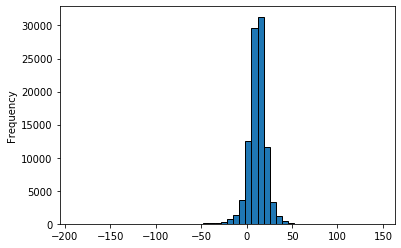

In [15]:
orders['duration_in_days'].plot(kind='hist', bins=50)

In [16]:
orders['on_time'] = ((orders['order_estimated_delivery_date'] - orders['order_delivered_customer_date'])/(np.timedelta64(1, 'D')))


In [17]:
order_items['total_value'] = order_items['price'].add(order_items['freight_value']) #create new column with price & freight included




In [18]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04


# 2. Visualizations

### Data is better understood when it is visualized





In [19]:
order_items['order_item_id'].value_counts().sort_index()

1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: order_item_id, dtype: int64

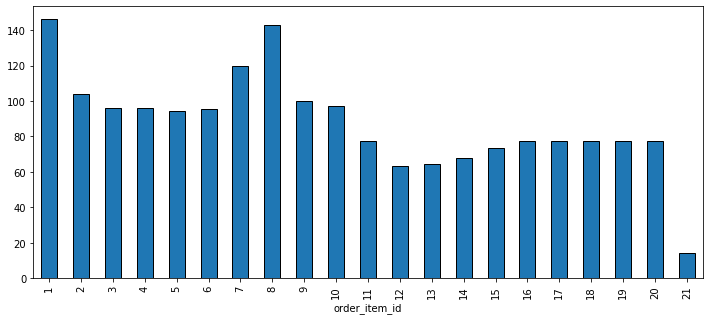

In [20]:
order_items.groupby('order_item_id')['total_value'].mean().plot(kind='bar',figsize=(12,5))




(-1.0999999999999999, 23.099999999999998)

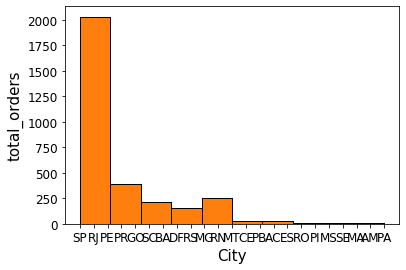

In [21]:
seller['seller_state'].hist(bins=10)
seller['seller_state'].hist(bins=10, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("City", fontsize=15)
plt.ylabel("total_orders",fontsize=15)
plt.xlim()
#most of the orders come from Sao Paolo, nearly 60% of orders come from SP


#seller['seller_state'].describe()
#seller['seller_state'].value_counts()

(0, 600)

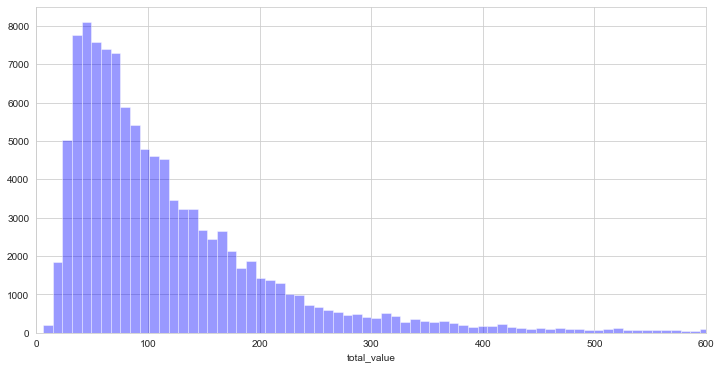

In [22]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.distplot(order_items['total_value'], bins=800 ,kde=False, color='b')
plt.xlim([0, 600])

`As expected, we got right skewed histogram for total_value column - most of the time, people buy cheaply priced goods on olist`

In [25]:
# need to figure out this part BRB later
state_grouped = (customer.groupby('customer_state')(order_items[['price'])

SyntaxError: invalid syntax (<ipython-input-25-5fbca6dee66e>, line 1)

In [45]:
#customer.head()
order_items.head()
#review.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04


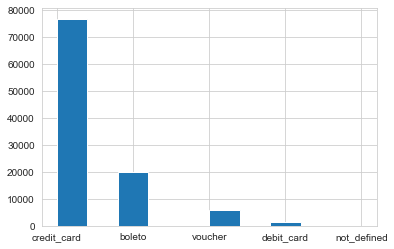

In [26]:
payment['payment_type'].hist(bins=10)
#boleto means check

In [28]:
#payment.payment_type.unique()

payment['payment_type'].value_counts() #frequency of e/ item in a column

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [63]:
print("Dataframe shape: ", orders_dropped.shape)
dt = (orders_dropped.index[-1] - orders_dropped.index[0])
print("Number of hours between start and end dates: ", dt.total_seconds()/3600 + 1)

Dataframe shape:  (99441, 0)
Number of hours between start and end dates:  3779.0158333333334


In [127]:
df1.head()

""
order_purchase_timestamp
2016-09-04 21:15:19
2016-09-05 00:15:34
2016-09-13 15:24:19
2016-09-15 12:16:38
2016-10-02 22:07:52


In [181]:
df1 = df1.sort_values(by='order_purchase_timestamp') #sort dates first to last



In [168]:
df1.head()

,order_purchase_timestamp
0,2016-09-04 21:15:19
1,2016-09-05 00:15:34
2,2016-09-13 15:24:19
3,2016-09-15 12:16:38
4,2016-10-02 22:07:52


# Total sales volume

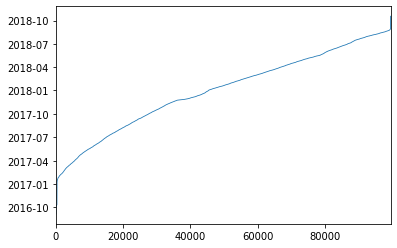

In [161]:
df1['order_purchase_timestamp'].plot(linewidth=0.8)

In [174]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 1 columns):
order_purchase_timestamp    99441 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.5 MB


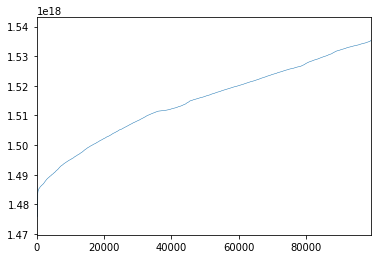

In [182]:
df1['order_purchase_timestamp'].plot(linewidth=0.5);

In [183]:
df1.query()

TypeError: query() missing 1 required positional argument: 'expr'

In [184]:
orders.query()

TypeError: query() missing 1 required positional argument: 'expr'

In [192]:
seller.profile_report(style={'full_width':True})

In [213]:
review[:1:]

TypeError: '(slice(None, 1, None), slice(None, None, None))' is an invalid key